In [52]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
columns = ["variables","f0-w0","f0-w1","f1-w0","f1-w1"]
variables = ["Temp","Wind speed","Humidity","Rain 1h","Clouds all"]
mses = pd.DataFrame(columns=columns)
maes = pd.DataFrame(columns=columns)

directory = "results"
results={}

k=0
for el in os.listdir(directory):
    name = el[26:-4]
    name = name.replace("wind_speed","Wind speed")
    name = name.replace("rain_1h","Rain 1h")
    name = name.replace("clouds_all","Clouds all")
    name = name.replace("temp","Temp")
    name = name.replace("humidity","Humidity")
    values = name.split("_")
    results_path = os.path.join(directory,el,"metrics.npy")
    r = np.load(results_path)
    
    s = f"{values[0]}-{values[1]}"
    
    vars = ""
    for var in variables:
        if(var in values):
            vars = f"{vars}T"
        else:
            vars = f"{vars}F"
    

    new_line = {"variables":vars,s:[r[1]]}
    mses = pd.concat([mses, pd.DataFrame(new_line)],ignore_index=True)
    
    new_line = {"variables":vars,s:[r[0]]}
    maes = pd.concat([maes, pd.DataFrame(new_line)],ignore_index=True)

display(mses)
display(maes)
# print(results)
# display(df)
# print(k)




C:\Users\Cata\AppData\Local\Temp\ipykernel_3768\1377517036.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  mses = pd.concat([mses, pd.DataFrame(new_line)],ignore_index=True)
C:\Users\Cata\AppData\Local\Temp\ipykernel_3768\1377517036.py:36: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  maes = pd.concat([maes, pd.DataFrame(new_line)],ignore_index=True)
C:\Users\Cata\AppData\Local\Temp\ipykernel_3768\1377517036.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA 

,variables,f0-w0,f0-w1,f1-w0,f1-w1
0,FFFFT,0.782622,NaN,NaN,NaN
1,FFFFT,0.829616,NaN,NaN,NaN
2,FFFFT,0.767758,NaN,NaN,NaN
3,FFTFT,0.768575,NaN,NaN,NaN
4,FFTFT,0.810575,NaN,NaN,NaN
...,...,...,...,...,...
373,FTFTT,NaN,NaN,NaN,0.759491
374,FTFTT,NaN,NaN,NaN,0.718302
375,FTFTF,NaN,NaN,NaN,0.719944
376,FTFTF,NaN,NaN,NaN,0.727298


,variables,f0-w0,f0-w1,f1-w0,f1-w1
0,FFFFT,0.675737,NaN,NaN,NaN
1,FFFFT,0.672580,NaN,NaN,NaN
2,FFFFT,0.654971,NaN,NaN,NaN
3,FFTFT,0.663360,NaN,NaN,NaN
4,FFTFT,0.680402,NaN,NaN,NaN
...,...,...,...,...,...
373,FTFTT,NaN,NaN,NaN,0.646291
374,FTFTT,NaN,NaN,NaN,0.617330
375,FTFTF,NaN,NaN,NaN,0.616327
376,FTFTF,NaN,NaN,NaN,0.615192


In [54]:
def convert(TF_string):
    var_string = ""
    for pos in range(len(variables)):
        if(TF_string[pos] == "T"):
            if(var_string == ""):
                var_string = f"{variables[pos]}"
            else:
                var_string = f"{var_string}, {variables[pos]}"
    
    if(var_string == ""):
        var_string = "No aditional variables"
    
    return var_string

print(convert("FTTTF"))
print(convert("FFFFF"))

Wind speed, Humidity, Rain 1h
No aditional variables


In [55]:
variables_maes = maes.groupby(by="variables").agg(["mean","std"])

variables_maes.at["FFFFF",("f0-w0","mean")] = variables_maes.at["FFFFF",("f1-w0","mean")]
variables_maes.at["FFFFF",("f0-w1","mean")] = variables_maes.at["FFFFF",("f1-w1","mean")]
variables_maes.at["FFFFF",("f0-w0","std")] = variables_maes.at["FFFFF",("f1-w0","std")]
variables_maes.at["FFFFF",("f0-w1","std")] = variables_maes.at["FFFFF",("f1-w1","std")]
variables_maes = variables_maes.round(3)
display(variables_maes)



f0-w0         f0-w1         f1-w0         f1-w1       
            mean    std   mean    std   mean    std   mean    std
variables                                                        
FFFFF      0.667  0.010  0.635  0.019  0.667  0.010  0.635  0.019
FFFFT      0.668  0.011  0.631  0.014  0.661  0.004  0.642  0.015
FFFTF      0.642  0.015  0.632  0.013  0.668  0.035  0.621  0.001
FFFTT      0.659  0.006  0.626  0.013  0.663  0.017  0.625  0.009
FFTFF      0.642  0.011  0.619  0.013  0.653  0.018  0.616  0.013
FFTFT      0.670  0.009  0.625  0.003  0.648  0.027  0.614  0.003
FFTTF      0.653  0.009  0.624  0.012  0.643  0.019  0.615  0.011
FFTTT      0.654  0.015  0.624  0.014  0.640  0.019  0.627  0.013
FTFFF      0.658  0.011  0.617  0.016  0.647  0.020  0.628  0.020
FTFFT      0.664  0.038  0.625  0.005  0.651  0.008  0.634  0.012
FTFTF      0.645  0.023  0.624  0.012  0.648  0.022  0.619  0.005
FTFTT      0.648  0.017  0.621  0.014  0.637  0.007  0.644  0.025
FTTFF      0.633  0.009  0.619  0.014  0.631  0.010  0.616  0.008
FTTFT      0.654  0.004  0.617  0.006  0.645  0.020  0.610  0.005
FTTTF      0.638  0.012  0.612  0.006  0.644  0.020  0.608  0.001
FTTTT      0.623  0.013  0.609  0.009  0.623  0.022  0.609  0.026
TFFFF      0.639  0.009  0.639  0.013  0.694  0.026  0.623  0.005
TFFFT      0.658  0.019  0.622  0.003  0.666  0.032  0.628  0.006
TFFTF      0.636  0.004  0.625  0.004  0.650  0.019  0.614  0.007
TFFTT      0.643  0.009  0.618  0.003  0.647  0.022  0.624  0.007
TFTFF      0.647  0.007  0.619  0.015  0.639  0.013  0.623  0.022
TFTFT      0.650  0.017  0.620  0.008  0.655  0.036  0.618  0.005
TFTTF      0.636  0.003  0.618  0.005  0.650  0.018  0.624  0.011
TFTTT      0.628  0.018  0.611  0.007  0.645  0.037  0.632  0.030
TTFFF      0.649  0.022  0.614  0.006  0.664  0.029  0.615  0.001
TTFFT      0.625  0.005  0.624  0.002  0.647  0.021  0.621  0.012
TTFTF      0.643  0.016  0.620  0.009  0.640  0.013  0.627  0.007
TTFTT      0.640  0.041  0.621  0.012  0.632  0.026  0.621  0.005
TTTFF      0.638  0.015  0.613  0.007  0.633  0.012  0.614  0.022
TTTFT      0.622  0.028  0.610  0.013  0.629  0.033  0.617  0.010
TTTTF      0.636  0.021  0.603  0.006  0.639  0.021  0.614  0.022
TTTTT      0.635  0.016  0.615  0.006  0.618  0.007  0.625  0.003

In [56]:
variables_mses = mses.groupby(by="variables").agg(["mean","std"])

variables_mses.at["FFFFF",("f0-w0","mean")] = variables_mses.at["FFFFF",("f1-w0","mean")]
variables_mses.at["FFFFF",("f0-w1","mean")] = variables_mses.at["FFFFF",("f1-w1","mean")]
variables_mses.at["FFFFF",("f0-w0","std")] = variables_mses.at["FFFFF",("f1-w0","std")]
variables_mses.at["FFFFF",("f0-w1","std")] = variables_mses.at["FFFFF",("f1-w1","std")]
variables_mses = variables_mses.round(3)
display(variables_mses)

f0-w0         f0-w1         f1-w0         f1-w1       
            mean    std   mean    std   mean    std   mean    std
variables                                                        
FFFFF      0.784  0.039  0.745  0.041  0.784  0.039  0.745  0.041
FFFFT      0.793  0.032  0.736  0.023  0.776  0.013  0.768  0.025
FFFTF      0.752  0.041  0.746  0.027  0.802  0.049  0.723  0.007
FFFTT      0.787  0.012  0.744  0.022  0.790  0.044  0.739  0.013
FFTFF      0.742  0.017  0.714  0.015  0.757  0.030  0.714  0.020
FFTFT      0.795  0.023  0.724  0.006  0.771  0.064  0.713  0.001
FFTTF      0.769  0.025  0.731  0.027  0.757  0.035  0.713  0.014
FFTTT      0.765  0.020  0.730  0.020  0.750  0.037  0.739  0.029
FTFFF      0.777  0.026  0.717  0.038  0.757  0.040  0.749  0.047
FTFFT      0.804  0.080  0.738  0.015  0.769  0.009  0.756  0.035
FTFTF      0.758  0.044  0.731  0.024  0.762  0.044  0.725  0.005
FTFTT      0.760  0.029  0.730  0.029  0.740  0.010  0.764  0.048
FTTFF      0.735  0.015  0.719  0.016  0.722  0.014  0.715  0.016
FTTFT      0.773  0.017  0.722  0.011  0.749  0.026  0.704  0.012
FTTTF      0.736  0.018  0.706  0.010  0.752  0.037  0.696  0.011
FTTTT      0.718  0.010  0.708  0.008  0.713  0.030  0.709  0.033
TFFFF      0.736  0.017  0.755  0.028  0.856  0.069  0.722  0.010
TFFFT      0.784  0.043  0.723  0.011  0.792  0.072  0.745  0.017
TFFTF      0.741  0.005  0.734  0.004  0.765  0.037  0.715  0.016
TFFTT      0.744  0.014  0.722  0.004  0.760  0.042  0.731  0.016
TFTFF      0.751  0.018  0.705  0.026  0.743  0.030  0.724  0.031
TFTFT      0.758  0.027  0.714  0.024  0.791  0.075  0.710  0.004
TFTTF      0.734  0.013  0.712  0.011  0.761  0.034  0.716  0.012
TFTTT      0.728  0.029  0.713  0.012  0.758  0.074  0.753  0.070
TTFFF      0.765  0.039  0.718  0.012  0.788  0.063  0.715  0.008
TTFFT      0.721  0.010  0.723  0.006  0.749  0.036  0.723  0.018
TTFTF      0.767  0.042  0.725  0.020  0.752  0.033  0.734  0.005
TTFTT      0.765  0.081  0.727  0.026  0.730  0.041  0.728  0.010
TTTFF      0.737  0.016  0.702  0.009  0.739  0.019  0.702  0.043
TTTFT      0.722  0.044  0.707  0.021  0.736  0.071  0.717  0.008
TTTTF      0.749  0.031  0.700  0.009  0.752  0.057  0.717  0.044
TTTTT      0.738  0.035  0.715  0.008  0.728  0.005  0.723  0.022

In [57]:
current = pd.DataFrame()
current["mae-ReLD"] = variables_maes[("f0-w1","mean")].astype(str)+ u"\u00B1" + variables_maes[("f0-w1","std")].astype(str)
current["mae-Vanilla"] = variables_maes[("f0-w0","mean")].astype(str)+ u"\u00B1" + variables_maes[("f0-w0","std")].astype(str)
current["mae-Gain"] = variables_maes[("f0-w0","mean")] - variables_maes[("f0-w1","mean")]

current["mse-ReLD"] = variables_mses[("f0-w1","mean")].astype(str)+ u"\u00B1" + variables_mses[("f0-w1","std")].astype(str)
current["mse-Vanilla"] = variables_mses[("f0-w0","mean")].astype(str)+ u"\u00B1" + variables_mses[("f0-w0","std")].astype(str)
current["mse-Gain"] = variables_mses[("f0-w0","mean")] - variables_mses[("f0-w1","mean")]
print(current["mae-Gain"].sort_values()[:3])
print(current["mse-Gain"].sort_values()[:3])
current["mae-Gain"] = current["mae-Gain"].round(3).astype(str) 
current["mse-Gain"] = current["mse-Gain"].round(3).astype(str) 

current.sort_index(key=lambda x: x.str.count("T"),inplace= True)
current.reset_index(inplace=True)
current["variables"] = current["variables"].map(lambda x: convert(x))
display(current)

print(current.to_latex(index=False))

variables
TFFFF    0.000
TTFFT    0.001
FFFTF    0.010
Name: mae-Gain, dtype: float32
variables
TFFFF   -0.019
TTFFT   -0.002
FFFTF    0.006
Name: mse-Gain, dtype: float32


,variables,mae-ReLD,mae-Vanilla,mae-Gain,mse-ReLD,mse-Vanilla,mse-Gain
0,No aditional variables,0.635±0.019,0.667±0.01,0.032,0.745±0.041,0.784±0.039,0.039
1,Clouds all,0.631±0.014,0.668±0.011,0.037,0.736±0.023,0.793±0.032,0.057
2,Rain 1h,0.632±0.013,0.642±0.015,0.01,0.746±0.027,0.752±0.041,0.006
3,Temp,0.639±0.013,0.639±0.009,0.0,0.755±0.028,0.736±0.017,-0.019
4,Humidity,0.619±0.013,0.642±0.011,0.023,0.714±0.015,0.742±0.017,0.028
5,Wind speed,0.617±0.016,0.658±0.011,0.041,0.717±0.038,0.777±0.026,0.06
6,"Temp, Humidity",0.619±0.015,0.647±0.007,0.028,0.705±0.026,0.751±0.018,0.046
7,"Wind speed, Humidity",0.619±0.014,0.633±0.009,0.014,0.719±0.016,0.735±0.015,0.016
8,"Wind speed, Rain 1h",0.624±0.012,0.645±0.023,0.021,0.731±0.024,0.758±0.044,0.027
9,"Wind speed, Clouds all",0.625±0.005,0.664±0.038,0.039,0.738±0.015,0.804±0.08,0.066


\begin{tabular}{lllllll}
\toprule
variables & mae-ReLD & mae-Vanilla & mae-Gain & mse-ReLD & mse-Vanilla & mse-Gain \\
\midrule
No aditional variables & 0.635±0.019 & 0.667±0.01 & 0.032 & 0.745±0.041 & 0.784±0.039 & 0.039 \\
Clouds all & 0.631±0.014 & 0.668±0.011 & 0.037 & 0.736±0.023 & 0.793±0.032 & 0.057 \\
Rain 1h & 0.632±0.013 & 0.642±0.015 & 0.01 & 0.746±0.027 & 0.752±0.041 & 0.006 \\
Temp & 0.639±0.013 & 0.639±0.009 & 0.0 & 0.755±0.028 & 0.736±0.017 & -0.019 \\
Humidity & 0.619±0.013 & 0.642±0.011 & 0.023 & 0.714±0.015 & 0.742±0.017 & 0.028 \\
Wind speed & 0.617±0.016 & 0.658±0.011 & 0.041 & 0.717±0.038 & 0.777±0.026 & 0.06 \\
Temp, Humidity & 0.619±0.015 & 0.647±0.007 & 0.028 & 0.705±0.026 & 0.751±0.018 & 0.046 \\
Wind speed, Humidity & 0.619±0.014 & 0.633±0.009 & 0.014 & 0.719±0.016 & 0.735±0.015 & 0.016 \\
Wind speed, Rain 1h & 0.624±0.012 & 0.645±0.023 & 0.021 & 0.731±0.024 & 0.758±0.044 & 0.027 \\
Wind speed, Clouds all & 0.625±0.005 & 0.664±0.038 & 0.039 & 0.738±0.015 & 0.8

In [58]:
future = pd.DataFrame()
future["mae-ReLD"] = variables_maes[("f1-w1","mean")].astype(str)+ u"\u00B1" + variables_maes[("f1-w1","std")].astype(str)
future["mae-Vanilla"] = variables_maes[("f1-w0","mean")].astype(str)+ u"\u00B1" + variables_maes[("f1-w0","std")].astype(str)
future["mae-Gain"] = variables_maes[("f1-w0","mean")] - variables_maes[("f1-w1","mean")]

future["mse-ReLD"] = variables_mses[("f1-w1","mean")].astype(str)+ u"\u00B1" + variables_mses[("f1-w1","std")].astype(str)
future["mse-Vanilla"] = variables_mses[("f1-w0","mean")].astype(str)+ u"\u00B1" + variables_mses[("f1-w0","std")].astype(str)
future["mse-Gain"] = variables_mses[("f1-w0","mean")] - variables_mses[("f1-w1","mean")]
print(future["mae-Gain"].sort_values()[:3])
print(future["mse-Gain"].sort_values()[:3])
future["mae-Gain"] = future["mae-Gain"].round(3).astype(str)
future["mse-Gain"] = future["mse-Gain"].round(3).astype(str)

future.sort_index(key=lambda x: x.str.count("T"),inplace= True)
future.reset_index(inplace=True)
future["variables"] = future["variables"].map(lambda x: convert(x))
display(future)

print(future.to_latex(index=False))

variables
TTTTT   -0.007
FTFTT   -0.007
TTFTT    0.011
Name: mae-Gain, dtype: float32
variables
FTFTT   -0.024
TTFTT    0.002
FTTTT    0.004
Name: mse-Gain, dtype: float32


,variables,mae-ReLD,mae-Vanilla,mae-Gain,mse-ReLD,mse-Vanilla,mse-Gain
0,No aditional variables,0.635±0.019,0.667±0.01,0.032,0.745±0.041,0.784±0.039,0.039
1,Clouds all,0.642±0.015,0.661±0.004,0.019,0.768±0.025,0.776±0.013,0.008
2,Rain 1h,0.621±0.001,0.668±0.035,0.047,0.723±0.007,0.802±0.049,0.079
3,Temp,0.623±0.005,0.694±0.026,0.071,0.722±0.01,0.856±0.069,0.134
4,Humidity,0.616±0.013,0.653±0.018,0.037,0.714±0.02,0.757±0.03,0.043
5,Wind speed,0.628±0.02,0.647±0.02,0.019,0.749±0.047,0.757±0.04,0.008
6,"Temp, Humidity",0.623±0.022,0.639±0.013,0.016,0.724±0.031,0.743±0.03,0.019
7,"Wind speed, Humidity",0.616±0.008,0.631±0.01,0.015,0.715±0.016,0.722±0.014,0.007
8,"Wind speed, Rain 1h",0.619±0.005,0.648±0.022,0.029,0.725±0.005,0.762±0.044,0.037
9,"Wind speed, Clouds all",0.634±0.012,0.651±0.008,0.017,0.756±0.035,0.769±0.009,0.013


\begin{tabular}{lllllll}
\toprule
variables & mae-ReLD & mae-Vanilla & mae-Gain & mse-ReLD & mse-Vanilla & mse-Gain \\
\midrule
No aditional variables & 0.635±0.019 & 0.667±0.01 & 0.032 & 0.745±0.041 & 0.784±0.039 & 0.039 \\
Clouds all & 0.642±0.015 & 0.661±0.004 & 0.019 & 0.768±0.025 & 0.776±0.013 & 0.008 \\
Rain 1h & 0.621±0.001 & 0.668±0.035 & 0.047 & 0.723±0.007 & 0.802±0.049 & 0.079 \\
Temp & 0.623±0.005 & 0.694±0.026 & 0.071 & 0.722±0.01 & 0.856±0.069 & 0.134 \\
Humidity & 0.616±0.013 & 0.653±0.018 & 0.037 & 0.714±0.02 & 0.757±0.03 & 0.043 \\
Wind speed & 0.628±0.02 & 0.647±0.02 & 0.019 & 0.749±0.047 & 0.757±0.04 & 0.008 \\
Temp, Humidity & 0.623±0.022 & 0.639±0.013 & 0.016 & 0.724±0.031 & 0.743±0.03 & 0.019 \\
Wind speed, Humidity & 0.616±0.008 & 0.631±0.01 & 0.015 & 0.715±0.016 & 0.722±0.014 & 0.007 \\
Wind speed, Rain 1h & 0.619±0.005 & 0.648±0.022 & 0.029 & 0.725±0.005 & 0.762±0.044 & 0.037 \\
Wind speed, Clouds all & 0.634±0.012 & 0.651±0.008 & 0.017 & 0.756±0.035 & 0.769±0.

In [59]:
number_mae = maes.groupby(by=maes["variables"].str.count("T")).agg(
    {
     "f0-w0":["mean","std"],
     "f0-w1":["mean","std"],
     "f1-w0":["mean","std"],
     "f1-w1":["mean","std"]
     })

number_mae.at[0,("f0-w0","mean")] = number_mae.at[0,("f1-w0","mean")]
number_mae.at[0,("f0-w1","mean")] = number_mae.at[0,("f1-w1","mean")]
number_mae.at[0,("f0-w0","std")] = number_mae.at[0,("f1-w0","std")]
number_mae.at[0,("f0-w1","std")] = number_mae.at[0,("f1-w1","std")]
number_mae['gain-f0'] = (number_mae[("f0-w0","mean")] - number_mae[("f0-w1","mean")])/number_mae[("f0-w1","mean")] *100
number_mae['gain-f1'] = (number_mae[("f1-w0","mean")] - number_mae[("f1-w1","mean")])/number_mae[("f0-w1","mean")] *100
display(number_mae)

f0-w0               f0-w1               f1-w0            \
               mean       std      mean       std      mean       std   
variables                                                               
0          0.666759  0.010478  0.635299  0.019486  0.666759  0.010478   
1          0.649851  0.015213  0.627729  0.014411  0.664679  0.025777   
2          0.651437  0.018591  0.622231  0.008992  0.650452  0.020568   
3          0.642859  0.013569  0.618685  0.007997  0.643904  0.017846   
4          0.629956  0.023041  0.610779  0.010206  0.633814  0.025285   
5          0.635091  0.015826  0.615425  0.006116  0.617629  0.006666   

              f1-w1             gain-f0   gain-f1  
               mean       std                      
variables                                          
0          0.635299  0.019486  4.951956  4.951956  
1          0.626035  0.014091  3.524166  6.156156  
2          0.620259  0.010798  4.693655  4.852363  
3          0.621584  0.014712  3.907313  3.607539  
4          0.618540  0.019333  3.139814  2.500740  
5          0.624647  0.003132  3.195419 -1.140286

In [60]:
def plot_line(x,y,yerr,label,linestyle="solid", color = "C1"):
    plt.plot(x,y,label=label, linestyle=linestyle, color = color)
    plt.fill_between(x,y-yerr,y+yerr, color=color, alpha=0.4)

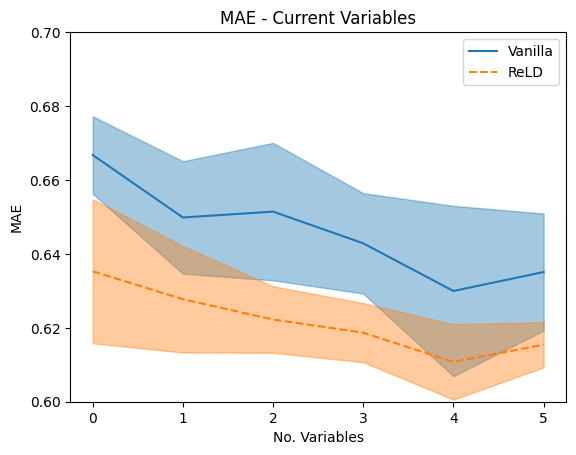

In [61]:
variables = [0,1,2,3,4,5]
plot_line(variables,number_mae[("f0-w0","mean")],number_mae[("f0-w0","std")],"Vanilla", linestyle="solid", color="C0")
plot_line(variables,number_mae[("f0-w1","mean")],number_mae[("f0-w1","std")],"ReLD", linestyle="dashed", color="C1")
plt.ylim((0.6,0.7))
plt.ylabel("MAE")
plt.xlabel("No. Variables")
plt.title("MAE - Current Variables")
plt.legend()

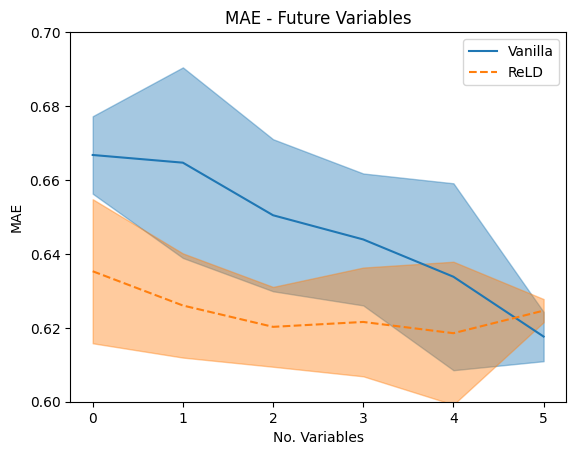

In [62]:
variables = [0,1,2,3,4,5]
plot_line(variables,number_mae[("f1-w0","mean")],number_mae[("f1-w0","std")],"Vanilla", linestyle="solid", color="C0")
plot_line(variables,number_mae[("f1-w1","mean")],number_mae[("f1-w1","std")],"ReLD", linestyle="dashed", color="C1")

plt.ylim((0.6,0.7))
plt.ylabel("MAE")
plt.xlabel("No. Variables")
plt.title("MAE - Future Variables")
plt.legend()

In [63]:
number_mse = mses.groupby(by=maes["variables"].str.count("T")).agg(
    {
     "f0-w0":["mean","std"],
     "f0-w1":["mean","std"],
     "f1-w0":["mean","std"],
     "f1-w1":["mean","std"]
     })

number_mse.at[0,("f0-w0","mean")] = number_mse.at[0,("f1-w0","mean")]
number_mse.at[0,("f0-w1","mean")] = number_mse.at[0,("f1-w1","mean")]
number_mse.at[0,("f0-w0","std")] = number_mse.at[0,("f1-w0","std")]
number_mse.at[0,("f0-w1","std")] = number_mse.at[0,("f1-w1","std")]
number_mse['gain-f0'] = (number_mse[("f0-w0","mean")] - number_mse[("f0-w1","mean")])/number_mse[("f0-w1","mean")] *100
number_mse['gain-f1'] = (number_mse[("f1-w0","mean")] - number_mse[("f1-w1","mean")])/number_mse[("f0-w1","mean")] *100
display(number_mse)

f0-w0               f0-w1               f1-w0            \
               mean       std      mean       std      mean       std   
variables                                                               
0          0.784456  0.038704  0.745491  0.041460  0.784456  0.038704   
1          0.760259  0.032663  0.733621  0.028470  0.789518  0.053692   
2          0.768987  0.038011  0.726687  0.018508  0.765820  0.043628   
3          0.749506  0.025151  0.718801  0.016403  0.754371  0.035032   
4          0.736300  0.042629  0.710700  0.016882  0.737951  0.051147   
5          0.738049  0.034591  0.714868  0.007832  0.728082  0.004734   

              f1-w1             gain-f0   gain-f1  
               mean       std                      
variables                                          
0          0.745491  0.041460  5.226756  5.226756  
1          0.735247  0.030249  3.631094  7.397610  
2          0.725956  0.021353  5.820926  5.485700  
3          0.721896  0.028545  4.271687  4.518024  
4          0.724735  0.037522  3.602025  1.859493  
5          0.723275  0.022381  3.242623  0.672456

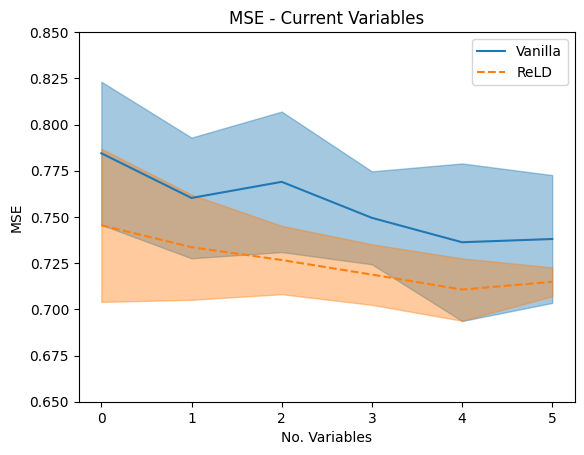

In [64]:
variables = [0,1,2,3,4,5]
plot_line(variables, number_mse[("f0-w0","mean")],number_mse[("f0-w0","std")],"Vanilla", linestyle="solid", color="C0")
plot_line(variables, number_mse[("f0-w1","mean")],number_mse[("f0-w1","std")],"ReLD", linestyle="dashed", color="C1")

plt.ylim((0.65,0.85))
plt.ylabel("MSE")
plt.xlabel("No. Variables")
plt.title("MSE - Current Variables")
plt.legend()

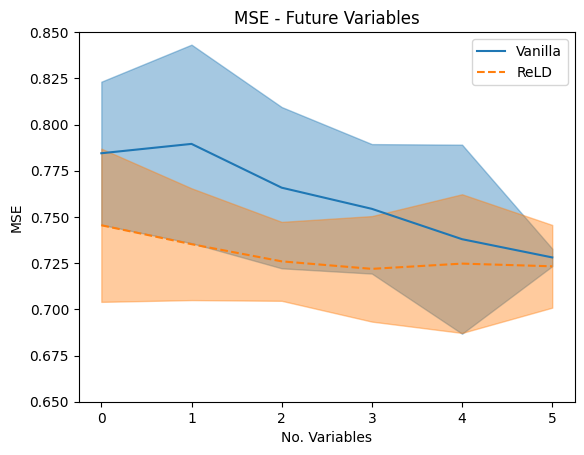

In [65]:
variables = [0,1,2,3,4,5]
plot_line(variables, number_mse[("f1-w0","mean")],number_mse[("f1-w0","std")],"Vanilla", linestyle="solid", color="C0")
plot_line(variables, number_mse[("f1-w1","mean")],number_mse[("f1-w1","std")],"ReLD", linestyle="dashed", color="C1")

plt.ylim((0.65,0.85))
plt.ylabel("MSE")
plt.xlabel("No. Variables")
plt.title("MSE - Future Variables")
plt.legend()

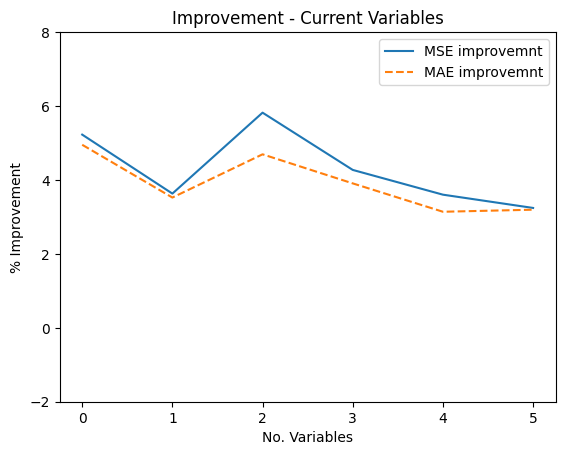

In [66]:
variables = [0,1,2,3,4,5]
plt.plot(variables,number_mse['gain-f0'],label="MSE improvemnt", linestyle="solid", color="C0")
plt.plot(variables,number_mae['gain-f0'],label="MAE improvemnt", linestyle="dashed", color="C1")

plt.ylim((-2,8))
plt.ylabel("% Improvement")
plt.xlabel("No. Variables")
plt.title("Improvement - Current Variables")
plt.legend()

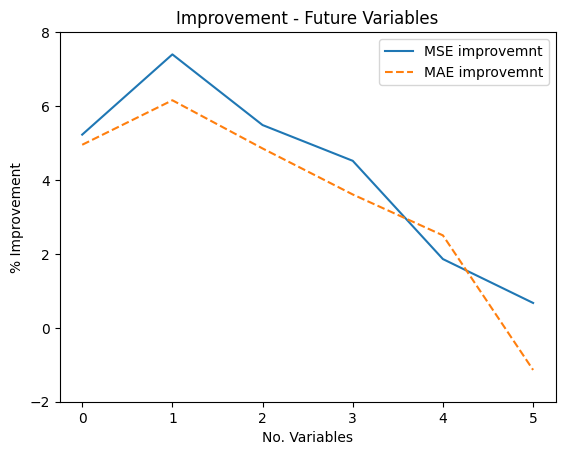

In [67]:
variables = [0,1,2,3,4,5]
plt.plot(variables,number_mse['gain-f1'],label="MSE improvemnt", linestyle="solid", color="C0")
plt.plot(variables,number_mae['gain-f1'],label="MAE improvemnt", linestyle="dashed", color="C1")


plt.ylim((-2,8))
plt.ylabel("% Improvement")
plt.xlabel("No. Variables")
plt.title("Improvement - Future Variables")
plt.legend()
